In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt

#stat
import statsmodels.api as sm
from scipy.stats import skew

In [2]:
df=pd.read_csv('/Users/candicewu/Desktop/merged dataset.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
0,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,4,9,...,46,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
1,2014-05-02,630000.0,4,2.75,2710,37277,2.0,0,3,9,...,23,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
2,2014-05-03,379880.0,3,2.50,1650,14054,1.0,0,4,7,...,37,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
3,2014-05-05,525888.0,5,1.75,2550,71874,1.0,0,5,7,...,63,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
4,2014-05-05,410000.0,3,2.25,1800,36704,1.0,0,4,8,...,45,Issaquah,0.1137,"1,079",0.850382,0.051,28.6,"102,760","27,855",41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20569,2015-04-08,1651000.0,4,3.25,3640,13530,1.0,0,3,9,...,99,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4
20570,2015-04-08,1200000.0,4,3.00,2150,8119,2.0,0,3,8,...,70,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4
20571,2015-04-10,2575000.0,5,3.00,4780,20440,1.0,0,4,10,...,48,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4
20572,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,3,11,...,17,Medina,0.0872,75,0.991565,0.022,19.8,"174,063","3,120",45.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20574 entries, 0 to 20573
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     20574 non-null  object 
 1   price                    20574 non-null  float64
 2   bedrooms                 20574 non-null  int64  
 3   bathrooms                20574 non-null  float64
 4   sqft_living              20574 non-null  int64  
 5   sqft_lot                 20574 non-null  int64  
 6   floors                   20574 non-null  float64
 7   view                     20574 non-null  int64  
 8   condition                20574 non-null  int64  
 9   grade                    20574 non-null  int64  
 10  yr_built                 20574 non-null  int64  
 11  zipcode                  20574 non-null  int64  
 12  year                     20574 non-null  int64  
 13  house_age                20574 non-null  int64  
 14  city                  

In [4]:
#check for missing values
df.isnull().sum()

date                       0
price                      0
bedrooms                   0
bathrooms                  0
sqft_living                0
sqft_lot                   0
floors                     0
view                       0
condition                  0
grade                      0
yr_built                   0
zipcode                    0
year                       0
house_age                  0
city                       0
typical_levy_rate          0
area_crime                 0
school_rate                0
unemployment_rate          0
travel_time_to_work        0
median_household_income    0
total_population           0
median_age                 0
dtype: int64

In [5]:
# find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]
duplicate_rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age


In [6]:
# remove duplicates based on all columns
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 20573
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     20574 non-null  object 
 1   price                    20574 non-null  float64
 2   bedrooms                 20574 non-null  int64  
 3   bathrooms                20574 non-null  float64
 4   sqft_living              20574 non-null  int64  
 5   sqft_lot                 20574 non-null  int64  
 6   floors                   20574 non-null  float64
 7   view                     20574 non-null  int64  
 8   condition                20574 non-null  int64  
 9   grade                    20574 non-null  int64  
 10  yr_built                 20574 non-null  int64  
 11  zipcode                  20574 non-null  int64  
 12  year                     20574 non-null  int64  
 13  house_age                20574 non-null  int64  
 14  city                  

In [7]:
#find the number of unique values for each columns
df.nunique()

date                        371
price                      3877
bedrooms                     13
bathrooms                    30
sqft_living                 995
sqft_lot                   9333
floors                        6
view                          5
condition                     5
grade                        11
yr_built                    116
zipcode                      67
year                          2
house_age                   116
city                         21
typical_levy_rate            38
area_crime                   39
school_rate                  40
unemployment_rate            64
travel_time_to_work          83
median_household_income     127
total_population             67
median_age                   45
dtype: int64

In [8]:
#find out unique values for selected columns
variables = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade','city' ]
subset_df = df[variables]

for column in subset_df.columns:
    unique_values = subset_df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'bedrooms': [ 3  4  5  2  7  6  1 11  8  0  9 10 33]
Unique values for 'bathrooms': [2.25 2.75 2.5  1.75 3.5  4.25 2.   6.5  3.   3.25 3.75 1.   4.5  4.75
 1.5  4.   1.25 0.75 0.   8.   5.   5.75 5.5  0.5  6.75 6.25 7.5  5.25
 6.   7.75]
Unique values for 'floors': [2.  1.  2.5 1.5 3.  3.5]
Unique values for 'view': [0 1 2 4 3]
Unique values for 'condition': [4 3 5 2 1]
Unique values for 'grade': [ 9  7  8 10 12  6 11  5  4 13  3]
Unique values for 'city': ['Issaquah' 'Seattle' 'Bellevue' 'Bothell' 'Redmond' 'Auburn' 'Renton'
 'Woodinville' 'Kent' 'Kirkland' 'North Bend' 'Sammamish' 'Federal Way'
 'Maple Valley' 'Duvall' 'Kenmore' 'Mercer Island' 'Black Diamond'
 'Enumclaw' 'Medina' 'Carnation']


In [9]:
df=df.drop(['yr_built', 'zipcode', 'year'], axis=1)

In [10]:
# replace commas with spaces in all columns
df = df.replace(',', '', regex=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,house_age,city,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
0,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,4,9,46,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
1,2014-05-02,630000.0,4,2.75,2710,37277,2.0,0,3,9,23,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
2,2014-05-03,379880.0,3,2.50,1650,14054,1.0,0,4,7,37,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
3,2014-05-05,525888.0,5,1.75,2550,71874,1.0,0,5,7,63,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7
4,2014-05-05,410000.0,3,2.25,1800,36704,1.0,0,4,8,45,Issaquah,0.1137,1079,0.850382,0.051,28.6,102760,27855,41.7


In [11]:
# convert the selected columns to numerical
df[['area_crime','median_household_income','total_population']] = df[['area_crime','median_household_income','total_population']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 20573
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     20574 non-null  object 
 1   price                    20574 non-null  float64
 2   bedrooms                 20574 non-null  int64  
 3   bathrooms                20574 non-null  float64
 4   sqft_living              20574 non-null  int64  
 5   sqft_lot                 20574 non-null  int64  
 6   floors                   20574 non-null  float64
 7   view                     20574 non-null  int64  
 8   condition                20574 non-null  int64  
 9   grade                    20574 non-null  int64  
 10  house_age                20574 non-null  int64  
 11  city                     20574 non-null  object 
 12  typical_levy_rate        20574 non-null  float64
 13  area_crime               20574 non-null  float64
 14  school_rate           

In [12]:
# convert the selected columns to object
df[['floors', 'view','condition','grade']] = df[['floors','view','condition','grade']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 20573
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     20574 non-null  object 
 1   price                    20574 non-null  float64
 2   bedrooms                 20574 non-null  int64  
 3   bathrooms                20574 non-null  float64
 4   sqft_living              20574 non-null  int64  
 5   sqft_lot                 20574 non-null  int64  
 6   floors                   20574 non-null  object 
 7   view                     20574 non-null  object 
 8   condition                20574 non-null  object 
 9   grade                    20574 non-null  object 
 10  house_age                20574 non-null  int64  
 11  city                     20574 non-null  object 
 12  typical_levy_rate        20574 non-null  float64
 13  area_crime               20574 non-null  float64
 14  school_rate           

In [13]:
round(df.describe(),2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,house_age,typical_levy_rate,area_crime,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age
count,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00,20574.00
mean,531767.56,3.36,2.10,2060.09,13989.57,52.46,0.11,19012.08,0.64,0.06,28.10,81817.84,33112.64,38.13
std,357410.65,0.93,0.77,905.34,37340.14,29.51,0.02,18320.60,0.18,0.02,3.41,24338.25,11322.43,3.45
min,75000.00,0.00,0.00,370.00,520.00,8.00,0.09,46.00,0.29,0.02,18.70,40656.00,3120.00,23.30
25%,319000.00,3.00,1.50,1410.00,5000.00,27.00,0.10,1747.00,0.53,0.05,26.20,63030.00,23968.00,36.10
50%,445000.00,3.00,2.25,1892.00,7508.00,49.00,0.10,5795.00,0.53,0.06,28.60,81037.00,32587.00,37.90
75%,635000.00,4.00,2.50,2520.00,10402.50,72.00,0.13,40649.00,0.82,0.07,30.10,93573.00,42590.00,40.40
max,7700000.00,33.00,8.00,13540.00,1651359.00,123.00,0.16,40649.00,0.99,0.11,36.60,182308.00,62216.00,47.40


/var/folders/rc/k2hbzd5x5735hz5cxlddg6x80000gn/T/ipykernel_3446/1740572810.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


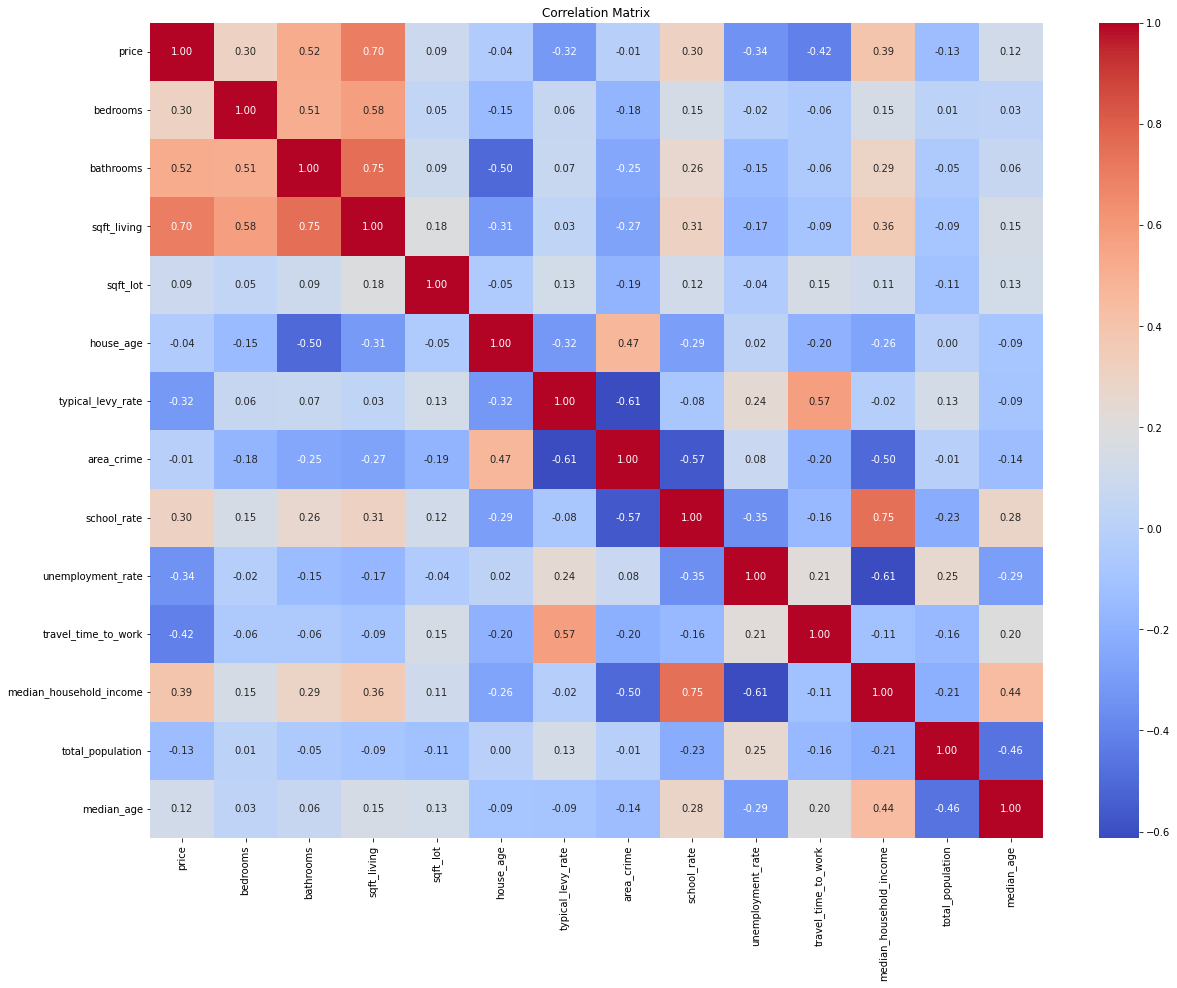

In [14]:
corr = df.corr()
# create a larger plot figure
fig, ax = plt.subplots(figsize=(20, 15))#the figsize parameter is set to (12, 10), which creates a plot figure with a width of 12 inches and a height of 10 inches.
sns.heatmap(corr, 
            cmap='coolwarm', 
            annot=True, # "annot=True" is used to add the correlation coefficient values to each cell in the heatmap
            fmt='.2f')  #fmt parameter is used to specify the format of the numeric values, '.2f' means the format of the numerica values to two decimal places.
plt.title('Correlation Matrix')
plt.show()

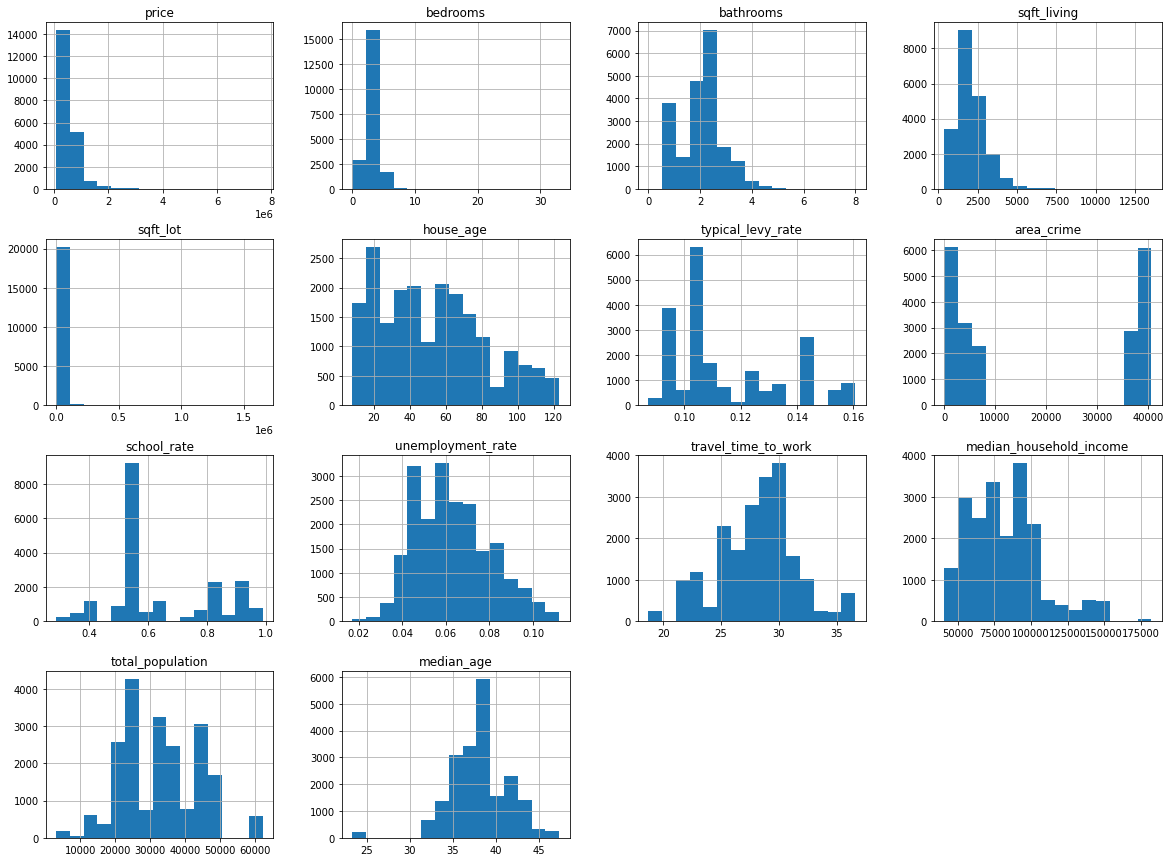

In [15]:
# Plot histograms for each variable 
df.hist(bins=15, figsize=(20,15))
plt.show()

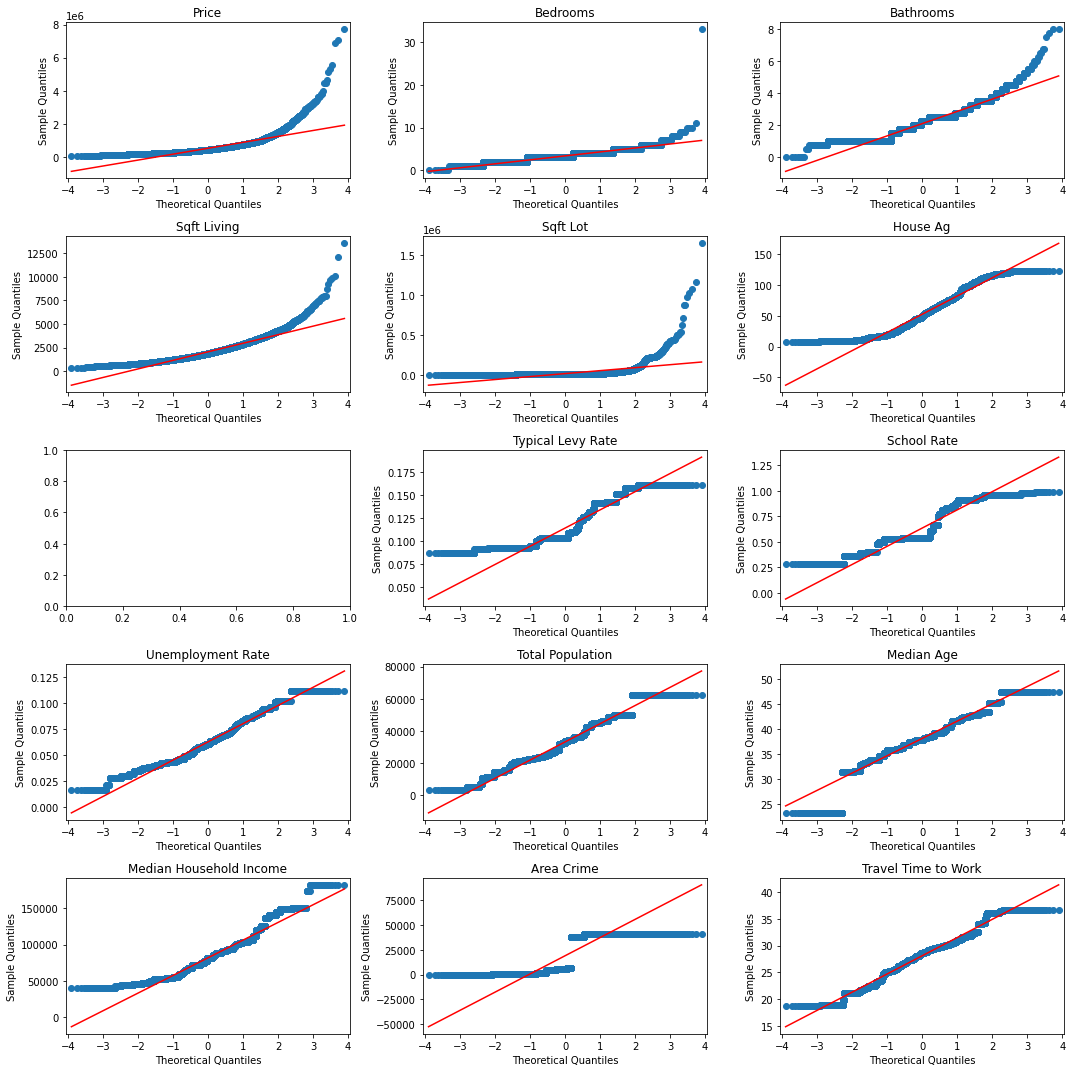

In [16]:
# create a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# create Q-Q plots for each variable
sm.qqplot(df['price'], line='s', ax=axs[0, 0])
sm.qqplot(df['bedrooms'], line='s', ax=axs[0, 1])
sm.qqplot(df['bathrooms'], line='s', ax=axs[0, 2])
sm.qqplot(df['sqft_living'], line='s', ax=axs[1, 0])
sm.qqplot(df['sqft_lot'], line='s', ax=axs[1, 1])
sm.qqplot(df['house_age'], line='s', ax=axs[1, 2])
sm.qqplot(df['typical_levy_rate'], line='s', ax=axs[2, 1])
sm.qqplot(df['school_rate'], line='s', ax=axs[2, 2])
sm.qqplot(df['unemployment_rate'], line='s', ax=axs[3, 0])
sm.qqplot(df['total_population'], line='s', ax=axs[3, 1])
sm.qqplot(df['median_age'], line='s', ax=axs[3, 2])
sm.qqplot(df['median_household_income'], line='s', ax=axs[4, 0])
sm.qqplot(df['area_crime'], line='s', ax=axs[4, 1])
sm.qqplot(df['travel_time_to_work'], line='s', ax=axs[4, 2])


# set the title for each subplot
axs[0, 0].set_title('Price')
axs[0, 1].set_title('Bedrooms')
axs[0, 2].set_title('Bathrooms')
axs[1, 0].set_title('Sqft Living')
axs[1, 1].set_title('Sqft Lot')
axs[1, 2].set_title('House Ag')
axs[2, 1].set_title('Typical Levy Rate')
axs[2, 2].set_title('School Rate')
axs[3, 0].set_title('Unemployment Rate')
axs[3, 1].set_title('Total Population')
axs[3, 2].set_title('Median Age')
axs[4, 0].set_title('Median Household Income')
axs[4, 1].set_title('Area Crime')
axs[4, 2].set_title('Travel Time to Work')


# adjust the spacing between subplots
fig.tight_layout()

# display the plot
plt.show()

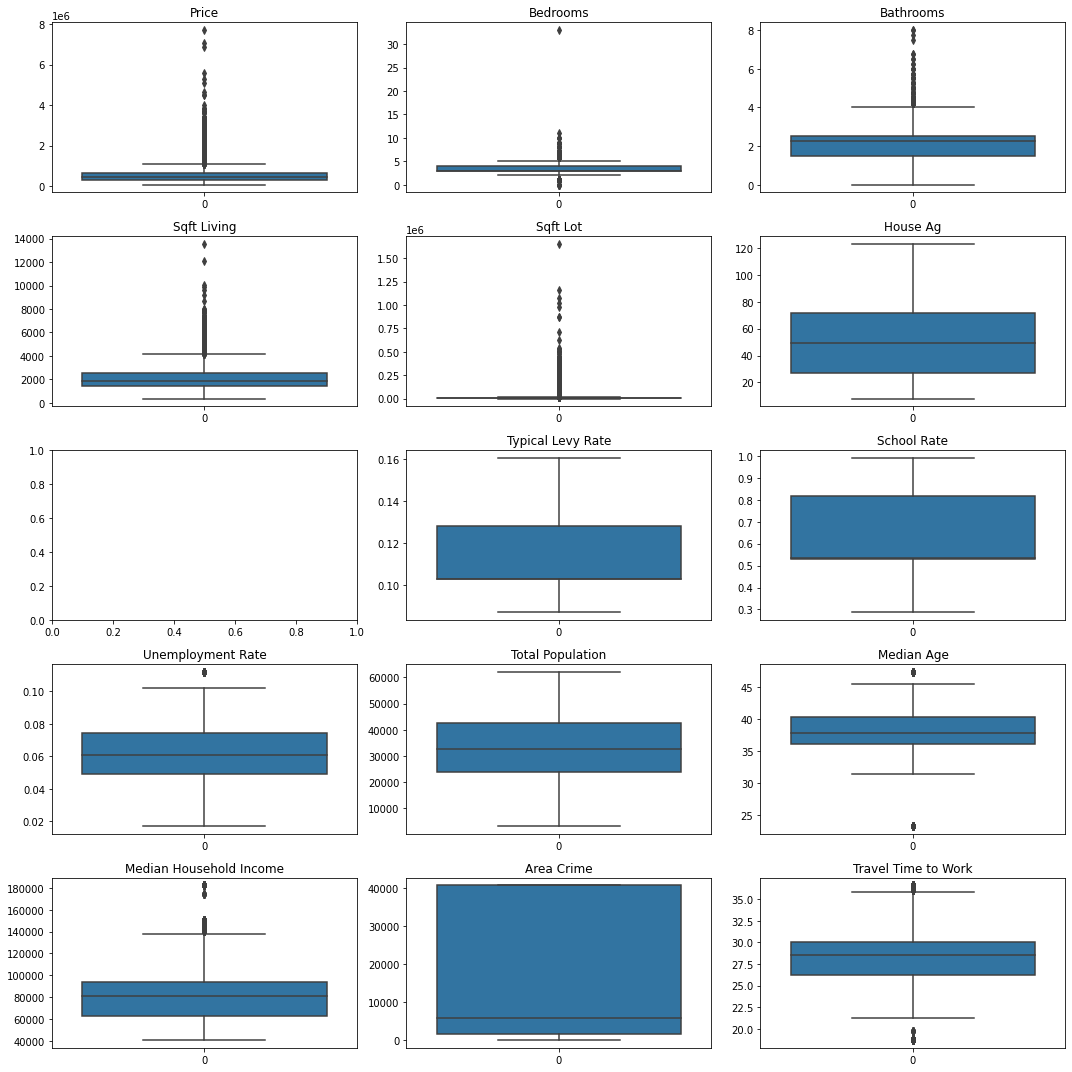

In [17]:

# create a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# create box plots for each variable
sns.boxplot(df['price'], whis=1.5, ax=axs[0, 0])
sns.boxplot(df['bedrooms'], whis=1.5, ax=axs[0, 1])
sns.boxplot(df['bathrooms'], whis=1.5, ax=axs[0, 2])
sns.boxplot(df['sqft_living'], whis=1.5, ax=axs[1, 0])
sns.boxplot(df['sqft_lot'], whis=1.5, ax=axs[1, 1])
sns.boxplot(df['house_age'], whis=1.5, ax=axs[1, 2])
sns.boxplot(df['typical_levy_rate'], whis=1.5, ax=axs[2, 1])
sns.boxplot(df['school_rate'], whis=1.5, ax=axs[2, 2])
sns.boxplot(df['unemployment_rate'], whis=1.5, ax=axs[3, 0])
sns.boxplot(df['total_population'], whis=1.5, ax=axs[3, 1])
sns.boxplot(df['median_age'], whis=1.5, ax=axs[3, 2])
sns.boxplot(df['median_household_income'], whis=1.5, ax=axs[4, 0])
sns.boxplot(df['area_crime'], whis=1.5, ax=axs[4, 1])
sns.boxplot(df['travel_time_to_work'], whis=1.5, ax=axs[4, 2])

# set the title for each subplot
axs[0, 0].set_title('Price')
axs[0, 1].set_title('Bedrooms')
axs[0, 2].set_title('Bathrooms')
axs[1, 0].set_title('Sqft Living')
axs[1, 1].set_title('Sqft Lot')
axs[1, 2].set_title('House Ag')
axs[2, 1].set_title('Typical Levy Rate')
axs[2, 2].set_title('School Rate')
axs[3, 0].set_title('Unemployment Rate')
axs[3, 1].set_title('Total Population')
axs[3, 2].set_title('Median Age')
axs[4, 0].set_title('Median Household Income')
axs[4, 1].set_title('Area Crime')
axs[4, 2].set_title('Travel Time to Work')

# adjust the spacing between subplots
fig.tight_layout()

# display the plot
plt.show()

https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa#:~:text=If%20the%20skewness%20is%20between%20%2D1%20and%20%2D0.5(negatively,the%20data%20are%20highly%20skewed.


In [18]:
# Loop through each column in the dataframe
for column in df.columns:

    # Check if the column contains numerical data
    if df[column].dtype == "float64" or df[column].dtype == "int64":

        # Calculate the skewness of the column
        skewness = skew(df[column])

        # Check if the skewness is moderately positive
        if 0.5 < abs(skewness) < 1:
            print(column, "has moderately positive skewness")
        elif abs(skewness) > 1:
            print(column, "has highly positive  skewed")
        elif -1< skewness < -0.5:
            print(column, "has moderately negative skewness")
        elif skewness< -1:
            print(column, "has highly negative skewed")
        else:
            print(column, "is approximately symmetric")

price has highly positive  skewed
bedrooms has highly positive  skewed
bathrooms has moderately positive skewness
sqft_living has highly positive  skewed
sqft_lot has highly positive  skewed
house_age is approximately symmetric
typical_levy_rate has moderately positive skewness
area_crime is approximately symmetric
school_rate is approximately symmetric
unemployment_rate is approximately symmetric
travel_time_to_work is approximately symmetric
median_household_income has moderately positive skewness
total_population is approximately symmetric
median_age has moderately positive skewness


Since bathrooms, taxtypical_levy_rate, median_household_income, and median_age have moderately positive skewness, we need to apply square root transformation method for those variables.

In [19]:
transf_df=df

#Apply square root transformation
transf_df['bathrooms_sqrt'] = np.sqrt(transf_df['bathrooms'])

transf_df['typical_levy_rate_sqrt'] = np.sqrt(transf_df['typical_levy_rate'])

transf_df['median_household_income_sqrt'] = np.sqrt(transf_df['median_household_income'])

transf_df['median_age_sqrt'] = np.sqrt(transf_df['median_age'])
transf_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,school_rate,unemployment_rate,travel_time_to_work,median_household_income,total_population,median_age,bathrooms_sqrt,typical_levy_rate_sqrt,median_household_income_sqrt,median_age_sqrt
0,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,4,9,...,0.850382,0.051,28.6,102760.0,27855.0,41.7,1.500000,0.337194,320.562006,6.457554
1,2014-05-02,630000.0,4,2.75,2710,37277,2.0,0,3,9,...,0.850382,0.051,28.6,102760.0,27855.0,41.7,1.658312,0.337194,320.562006,6.457554
2,2014-05-03,379880.0,3,2.50,1650,14054,1.0,0,4,7,...,0.850382,0.051,28.6,102760.0,27855.0,41.7,1.581139,0.337194,320.562006,6.457554
3,2014-05-05,525888.0,5,1.75,2550,71874,1.0,0,5,7,...,0.850382,0.051,28.6,102760.0,27855.0,41.7,1.322876,0.337194,320.562006,6.457554
4,2014-05-05,410000.0,3,2.25,1800,36704,1.0,0,4,8,...,0.850382,0.051,28.6,102760.0,27855.0,41.7,1.500000,0.337194,320.562006,6.457554


Since price, bedrooms, sqft_living, and sqft_lot have highly positive  skewed, we need to apply log transformation method for those variables.

In [20]:
#Apply logarithmic( log10)
transf_df['price_log'] = np.log10(transf_df['price'])

transf_df['bedrooms_log'] = np.log10(transf_df['bedrooms'])

transf_df['sqft_living_log'] = np.log10(transf_df['sqft_living'])

transf_df['sqft_lot_log'] = np.log10(transf_df['sqft_lot'])
transf_df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,total_population,median_age,bathrooms_sqrt,typical_levy_rate_sqrt,median_household_income_sqrt,median_age_sqrt,price_log,bedrooms_log,sqft_living_log,sqft_lot_log
0,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,4,9,...,27855.0,41.7,1.500000,0.337194,320.562006,6.457554,5.640978,0.477121,3.294466,4.545307
1,2014-05-02,630000.0,4,2.75,2710,37277,2.0,0,3,9,...,27855.0,41.7,1.658312,0.337194,320.562006,6.457554,5.799341,0.602060,3.432969,4.571441
2,2014-05-03,379880.0,3,2.50,1650,14054,1.0,0,4,7,...,27855.0,41.7,1.581139,0.337194,320.562006,6.457554,5.579646,0.477121,3.217484,4.147800
3,2014-05-05,525888.0,5,1.75,2550,71874,1.0,0,5,7,...,27855.0,41.7,1.322876,0.337194,320.562006,6.457554,5.720893,0.698970,3.406540,4.856572
4,2014-05-05,410000.0,3,2.25,1800,36704,1.0,0,4,8,...,27855.0,41.7,1.500000,0.337194,320.562006,6.457554,5.612784,0.477121,3.255273,4.564713


In [21]:
transf_df =transf_df[['condition','grade','view', 'floors', 'date', 'city',
                      'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'price_log','bedrooms_log','bathrooms_sqrt', 'sqft_living_log','sqft_lot_log',
                  'house_age', 'school_rate','unemployment_rate', 'travel_time_to_work',
                  'total_population', 'typical_levy_rate', 'median_age', 'median_household_income', 
                   'area_crime','typical_levy_rate_sqrt', 'median_age_sqrt','median_household_income_sqrt' ]]
transf_df.head()

,condition,grade,view,floors,date,city,price,bedrooms,bathrooms,sqft_living,...,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime,typical_levy_rate_sqrt,median_age_sqrt,median_household_income_sqrt
0,4,9,0,2.0,2014-05-02,Issaquah,437500.0,3,2.25,1970,...,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0,0.337194,6.457554,320.562006
1,3,9,0,2.0,2014-05-02,Issaquah,630000.0,4,2.75,2710,...,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0,0.337194,6.457554,320.562006
2,4,7,0,1.0,2014-05-03,Issaquah,379880.0,3,2.50,1650,...,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0,0.337194,6.457554,320.562006
3,5,7,0,1.0,2014-05-05,Issaquah,525888.0,5,1.75,2550,...,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0,0.337194,6.457554,320.562006
4,4,8,0,1.0,2014-05-05,Issaquah,410000.0,3,2.25,1800,...,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0,0.337194,6.457554,320.562006


In [22]:
transf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 20573
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   condition                     20574 non-null  object 
 1   grade                         20574 non-null  object 
 2   view                          20574 non-null  object 
 3   floors                        20574 non-null  object 
 4   date                          20574 non-null  object 
 5   city                          20574 non-null  object 
 6   price                         20574 non-null  float64
 7   bedrooms                      20574 non-null  int64  
 8   bathrooms                     20574 non-null  float64
 9   sqft_living                   20574 non-null  int64  
 10  sqft_lot                      20574 non-null  int64  
 11  price_log                     20574 non-null  float64
 12  bedrooms_log                  20574 non-null  float64
 13  b

In [23]:
variables = [  'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'price_log','bedrooms_log','bathrooms_sqrt', 'sqft_living_log','sqft_lot_log',
                  'house_age', 'school_rate','unemployment_rate', 'travel_time_to_work',
                  'total_population', 'typical_levy_rate', 'median_age', 'median_household_income', 
                   'area_crime','typical_levy_rate_sqrt', 'median_age_sqrt','median_household_income_sqrt']
subset_df = transf_df[variables]

# Description
print(subset_df.describe())

# Missing values
print(subset_df.isnull().sum())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.057400e+04  20574.000000  20574.000000  20574.000000  2.057400e+04   
mean   5.317676e+05      3.364635      2.103188   2060.088996  1.398957e+04   
std    3.574106e+05      0.929501      0.766590    905.337414  3.734014e+04   
min    7.500000e+04      0.000000      0.000000    370.000000  5.200000e+02   
25%    3.190000e+05      3.000000      1.500000   1410.000000  5.000000e+03   
50%    4.450000e+05      3.000000      2.250000   1892.000000  7.508000e+03   
75%    6.350000e+05      4.000000      2.500000   2520.000000  1.040250e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

          price_log  bedrooms_log  bathrooms_sqrt  sqft_living_log  \
count  20574.000000  2.057400e+04    20574.000000     20574.000000   
mean       5.660931          -inf        1.425048         3.275344   
std        0.227128           NaN        0.269130         0.183340   
min     

Since the presence of negative infinity (-inf) values in the 'bedrooms_log' variable will cause an empty histogram, we should remove that variable for furture modeling.

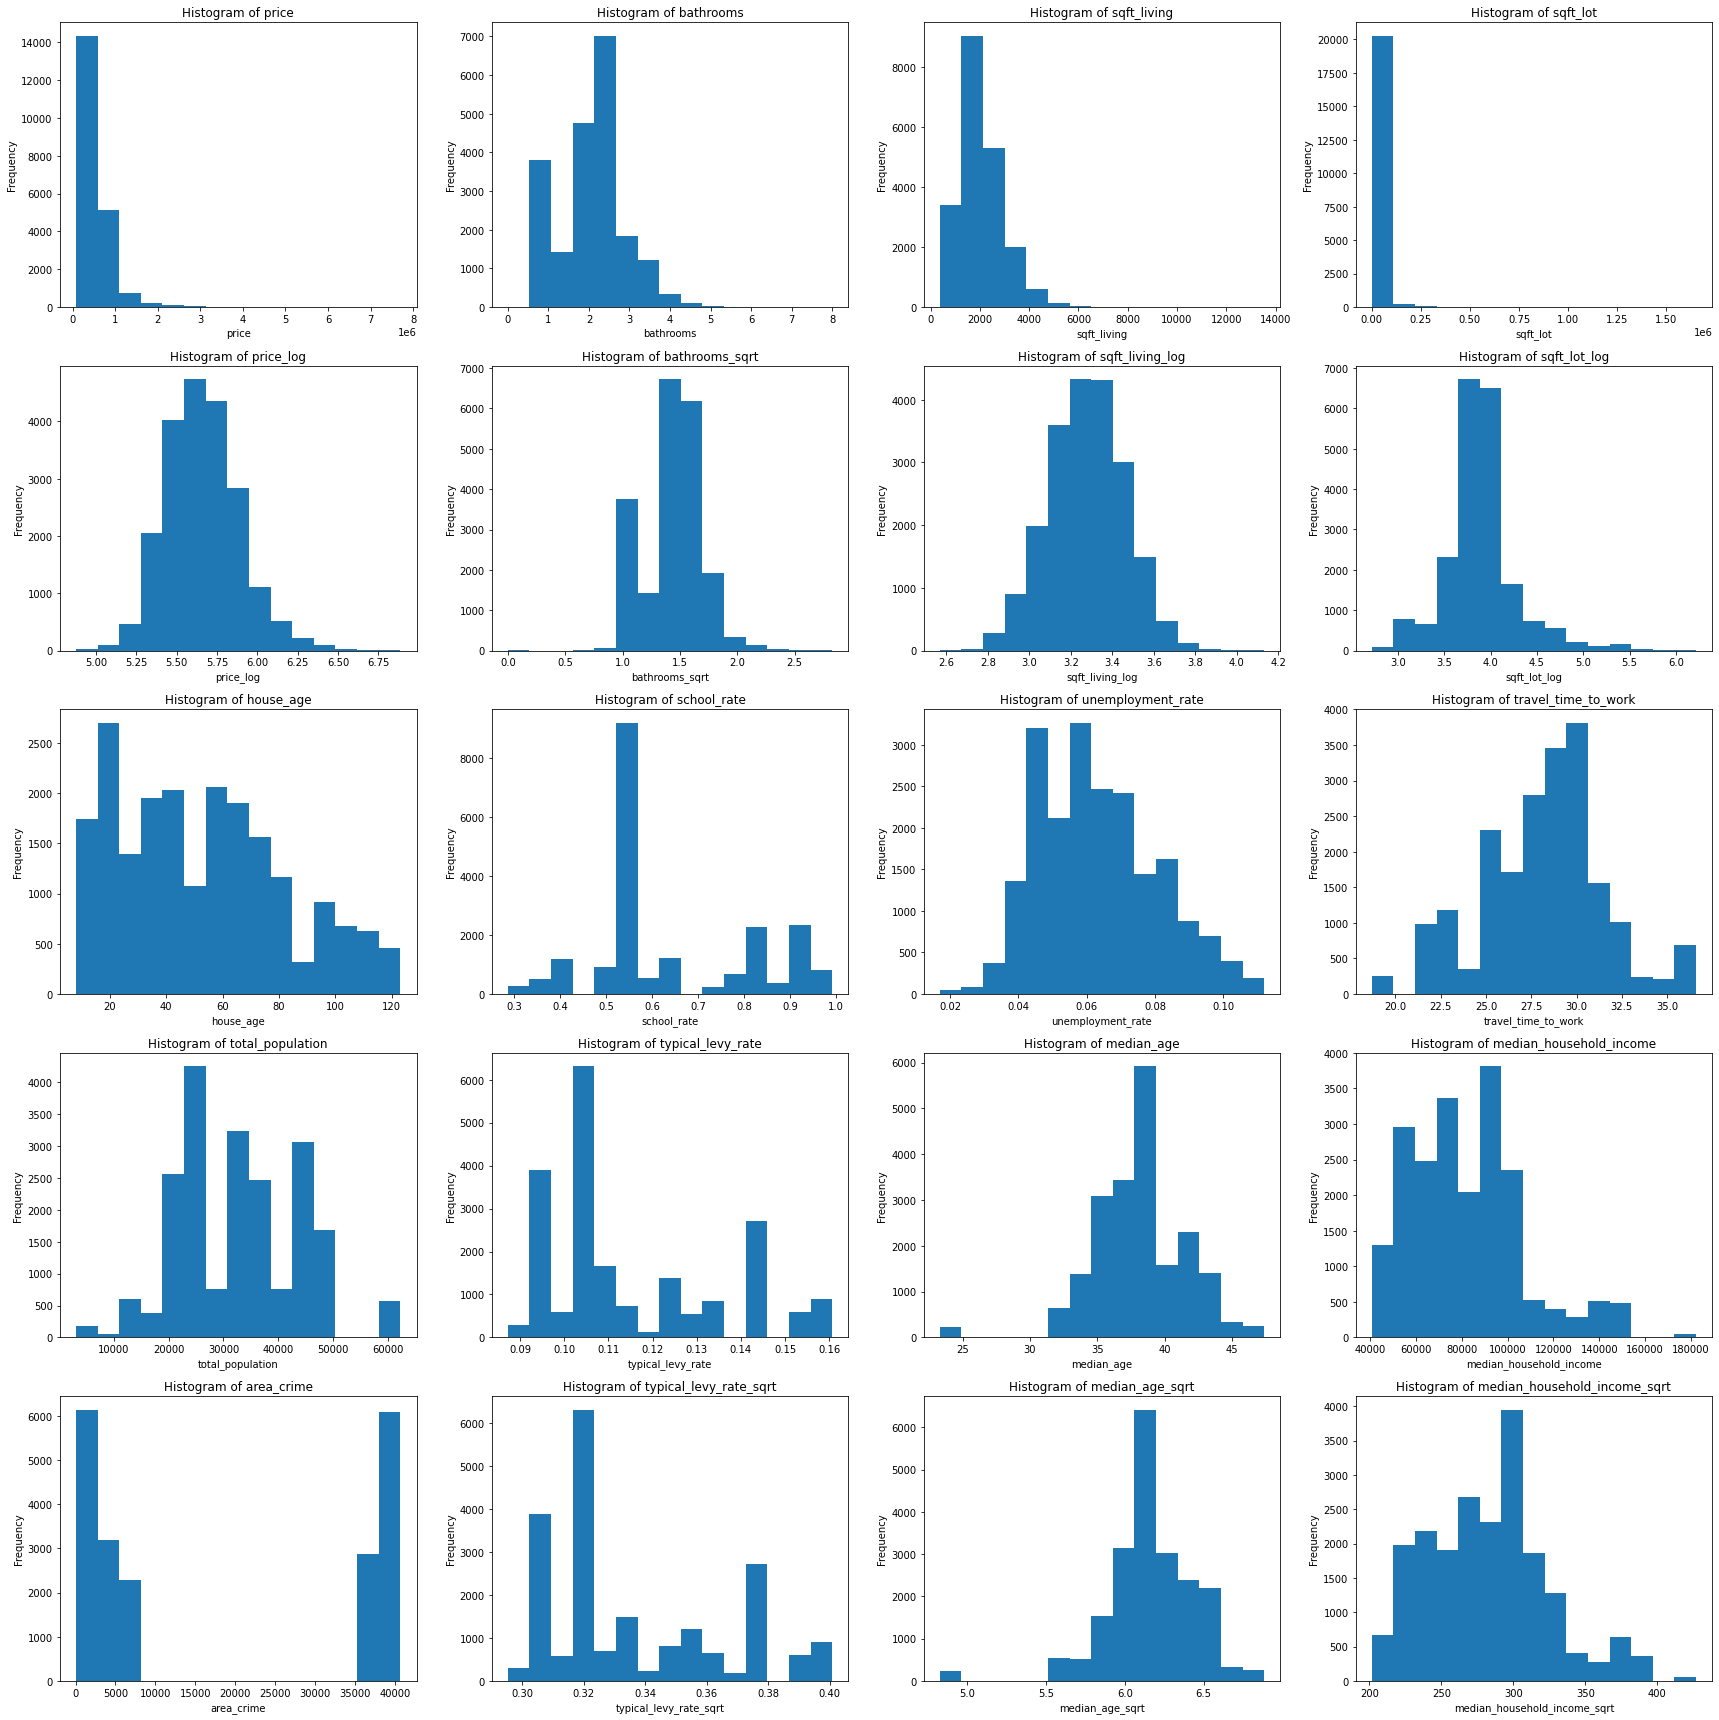

In [24]:
# Select the columns
transf_columns = [  'price',  'bathrooms', 'sqft_living', 'sqft_lot',
                  'price_log','bathrooms_sqrt', 'sqft_living_log','sqft_lot_log',
                  'house_age', 'school_rate','unemployment_rate', 'travel_time_to_work',
                  'total_population', 'typical_levy_rate', 'median_age', 'median_household_income', 
                   'area_crime','typical_levy_rate_sqrt', 'median_age_sqrt','median_household_income_sqrt']

# Create a figure and axis for the subplots
fig, axs = plt.subplots(5, 4, figsize=(24, 24))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot histograms for each transformed variable
for i, column in enumerate(transf_columns):
    axs[i].hist(transf_df[column], bins=15)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of ' + column)

# Hide empty subplots if the number of variables is less than 16
if len(transf_columns) < 16:
    for j in range(len(transf_columns), 16):
        axs[j].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


After analyzing the histograms of typical_levy_rate_sqrt, median_age_sqrt, and median_household_income_sqrt, it is evident that their distributions did not exhibit a significant improvement in symmetry. Therefore, we have decided not to include those variables in our future studies.

However, upon observing the histograms of price_log, bathrooms_sqrt, sqft_living_log, and sqft_lot_log, we noticed that their distributions have become more symmetric, indicating a closer resemblance to normal distributions. Consequently, we have chosen to utilize these variables instead of price, bathroom, sqft_living, and sqft_lot for our further modeling.

In [25]:
df= transf_df[[ 'price_log', 'date', 'city', 'condition','grade', 'view','floors','bedrooms','bathrooms_sqrt', 'sqft_living_log','sqft_lot_log',
                  'house_age', 'school_rate','unemployment_rate', 'travel_time_to_work',
                  'total_population', 'typical_levy_rate', 'median_age', 'median_household_income', 'area_crime'
                    ]]
df.head()

,price_log,date,city,condition,grade,view,floors,bedrooms,bathrooms_sqrt,sqft_living_log,sqft_lot_log,house_age,school_rate,unemployment_rate,travel_time_to_work,total_population,typical_levy_rate,median_age,median_household_income,area_crime
0,5.640978,2014-05-02,Issaquah,4,9,0,2.0,3,1.500000,3.294466,4.545307,46,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
1,5.799341,2014-05-02,Issaquah,3,9,0,2.0,4,1.658312,3.432969,4.571441,23,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
2,5.579646,2014-05-03,Issaquah,4,7,0,1.0,3,1.581139,3.217484,4.147800,37,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
3,5.720893,2014-05-05,Issaquah,5,7,0,1.0,5,1.322876,3.406540,4.856572,63,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0
4,5.612784,2014-05-05,Issaquah,4,8,0,1.0,3,1.500000,3.255273,4.564713,45,0.850382,0.051,28.6,27855.0,0.1137,41.7,102760.0,1079.0


In [26]:
# find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                0 non-null      float64
 1   date                     0 non-null      object 
 2   city                     0 non-null      object 
 3   condition                0 non-null      object 
 4   grade                    0 non-null      object 
 5   view                     0 non-null      object 
 6   floors                   0 non-null      object 
 7   bedrooms                 0 non-null      int64  
 8   bathrooms_sqrt           0 non-null      float64
 9   sqft_living_log          0 non-null      float64
 10  sqft_lot_log             0 non-null      float64
 11  house_age                0 non-null      int64  
 12  school_rate              0 non-null      float64
 13  unemployment_rate        0 non-null      float64
 14  travel_time_to_work      0 non-null   

In [27]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 20573
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                20574 non-null  float64
 1   date                     20574 non-null  object 
 2   city                     20574 non-null  object 
 3   condition                20574 non-null  object 
 4   grade                    20574 non-null  object 
 5   view                     20574 non-null  object 
 6   floors                   20574 non-null  object 
 7   bedrooms                 20574 non-null  int64  
 8   bathrooms_sqrt           20574 non-null  float64
 9   sqft_living_log          20574 non-null  float64
 10  sqft_lot_log             20574 non-null  float64
 11  house_age                20574 non-null  int64  
 12  school_rate              20574 non-null  float64
 13  unemployment_rate        20574 non-null  float64
 14  travel_time_to_work   

In [28]:
df.to_csv('/Users/candicewu/Desktop/cleaned_dataset.csv', index=False)